## Аннотация: Исследование продаж консольных игр

На основе данных о продажах игр в различных регионах, оценках пользователей и критиков, жанрах и платформах нужно выявить определяющие успешность игры закономерности. 

**Цель исследования:**  - спланировать рекламную кампанию на 2017 год. 

**Задача исследования:** проанализировать имеющиеся данные и сделать вывод о том, какой продукт будет потенциально популярен у пользователей.

## Знакомство с данными

In [39]:
#импортируем библиотеки, которые понадобятся нам в исследовании
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [40]:
initial_data = pd.read_csv('/datasets/games.csv') #применяем специальный метод для чтения файла формата csv
initial_data.info() #запрашиваем и выводим общую информацию об исходном датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [41]:
#произведем обзор полученных данных, вызвав 10 верхних и нижних строк датафрейма
display(initial_data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [42]:
display(initial_data.tail(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [43]:
#вызовем метод describe() для изучения основных статистических характеристик полученных данных
initial_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [44]:
#проверим данные на наличие явных дубликатов
print(initial_data.duplicated().sum())

0


### Вывод

Всего в датафрейме 11 столбцов и 16715 строк.
Знакомство с данными позволило выявить следующие проблемы, требующие решения:
- прыгающий регистр в названии столбцов;
- некорректный тип данных в столбцах Year_of_Release и User_Score;
- большое количество пропущенных значений, особенно в данных с возрастным рейтингом и оценками.

## Предобработка данных

### Корректировка регистра и типов данных 

Переходим к этапу предобработки данных. Начнем с корректировки прыгающего регистра в названии столбцов и изменения типов данных.

In [45]:
#приведем все названия столбцов к нижнему регистру
initial_data.columns = initial_data.columns.str.lower()
print(initial_data.columns) #проверим результат

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Теперь изменим типы данных в столбцах с годом выпуска и оценкой пользователей. Т.к оценка чаще всего включает в себя значение после запятой, изменим тип данных на float. А вот года выпуска стоит привести к целочисленному формату, однако сейчас этому препятствует наличие пропусков. 

Проверим, какую долю они и пропуски в остальных столбцах занимают от всех данных.

In [46]:
print(initial_data.isna().sum().sort_values()/initial_data.shape[0]*100)

platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.011965
genre               0.011965
year_of_release     1.609333
user_score         40.089740
rating             40.478612
critic_score       51.319174
dtype: float64


Доля пропущенных значений в столбцах name, genre и year_of_release достаточно незначительна, поэтому можно удалить соответствующие строки без опасений, что это существенно повлияет на результаты исследования. А вот пропусков в столбцах critic_score, user_score и rating критически много. 

Теперь попробуем выяснить, с чем связано присвоение типа object данным о пользовательских оценках. Посмотрим, какие значения встречаются в столбце:

In [47]:
print(initial_data ['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


В столбце, помимо числовых, присутствует значение «tbd», которое и повлияло на тип данных во всем столбце. Согласно информации из открытых источников, данная аббревиатура обозначает количество обзоров на игру, недостаточное для выставления оценки. Заменим данное значение на nan, т.к. замена на среднее или медианное значение некорректна из-за значения аббревиатуры, и вернемся к этому на следующем этапе.

Приступаем к обработке и изменению типов данных:

In [48]:
#меняем значения и тип данных в столбце пользовательских оценок
initial_data ['user_score'] = initial_data ['user_score'].replace('tbd', np.nan).astype('float')
#удаляем пропуски в столбцах с их малой долей
initial_data = initial_data.dropna(subset =['name', 'genre', 'year_of_release']) 
#меняем тип данных в столбце с годами выпуска
initial_data ['year_of_release'] = initial_data ['year_of_release'].astype('int')      

### Обработка пропусков

Продолжим обрабатывать пропуски в данных. Пропущенные значения остались в столбцах с оценками пользователей и критиков, а также с возрастным рейтингом. Если в случае с жанрами, названиями и годами выпусков я склонна объяснить наличие пропусков сбоем при выгрузке данных при составлении датасета (из-за крайне малого количества), то в случае оценок можно предположить, что игра не пользовалась особой популярностью, поэтому и не получила оценку. То есть обзоров на игры с пропущенными оценками было либо меньше, чем у оцененных «tbd», либо не было вовсе. Исходя из этого предположения, заменим пропуски в столбцах с оценками на нули.

In [49]:
initial_data['user_score'] = initial_data['user_score'].fillna(0)
initial_data['critic_score'] = initial_data['critic_score'].fillna(0)

Остались пропуски в столбце с возрастным рейтингом. Причины их могут быть опять же связаны с популярностью игр, а также, возможно, пропуски означают, что игре был присвоен иной рейтинг.

Заменим пропущенные значения в столбце на значение "unknown":

In [50]:
initial_data['rating'] = initial_data['rating'].fillna('unknown')

Все пропуски обработаны, можем переходить к подсчету суммарных продаж игр во всех регионах.

### Подсчет суммарных продаж

In [51]:
#добавим в таблицу столбец с результатами суммирования продаж каждой игры в разных регионах
initial_data['total_sales'] = initial_data['na_sales'] + initial_data['eu_sales'] + initial_data['jp_sales'] + initial_data['other_sales']
display(initial_data.head()) #проверим результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38


### Вывод

Этот этап исследования был посвящен предобработке исходных данных. Для улучшения их качества было сделано следующее:
- скорректирован регистр в названии столбцов;
- изменены типы некоторых данных;
- обработаны пропуски в данных (путем удаления и подстановки значений);
- подсчитаны суммарные продажи игр. 

На этом предобработку данных можно считать оконченной. Переходим к исследовательскому анализу данных.

## Исследовательский анализ данных

### Исследование динамики выпуска игр по годам

Начнем анализ с исследования динамики выпуска консольных игр по годам.

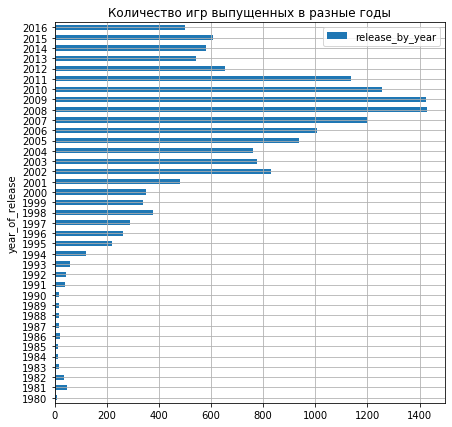

In [52]:
#сгруппируем данные по дате выпуска игр 
release_by_year = initial_data.groupby('year_of_release').agg({'year_of_release':'count'}).rename(
                  columns= {'year_of_release':'release_by_year'})
#построим график по сгруппированным данным
release_by_year.plot(kind='barh', figsize=(7, 7), grid=True, title='Количество игр выпущенных в разные годы')
plt.show()

Как показывает диаграмма, пик выпуска игр пришелся на 2008-2009 гг, а вплоть до 1994 года их выпускали крайне мало по сравнению с объемами остального рассматриваемого периода. Поэтому можно в последующих шагах анализа сконцентрироваться на временном промежутке с 1994 по 2016 год.

### Исследование динамики продаж игр по платформам

Нам нужно составить рейтинг платформ по суммарным продажам. С этой целью сгруппируем имеющиеся данные по платформам, подсчитаем сумму продаж, приходящихся на каждую платформу, отсортируем получившиеся данные по убыванию и выведем на экран 10 верхних строк.

In [53]:
top_selling_platforms = initial_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(
    'total_sales', ascending=False).reset_index()
display(top_selling_platforms.head(10))

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Вычленим из исходной таблицы данные, относящиеся к данным платформам. Для начала создадим вручную список с платформами из топ-10, а затем сделаем срез из таблицы с изначальными данными

In [54]:
top_selling_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'] #создаем список
info_about_top_selling_platforms = initial_data.query('platform in @top_selling_platforms') #делаем срез данных
display(info_about_top_selling_platforms.tail(10)) #проверяем корректность среза
#возьмем строки с конца таблицы, т.к. они более наглядны

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.0,67.0,0.0,E,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.0,48.0,0.0,E,0.01
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.0,0.0,0.0,unknown,0.01
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.0,0.0,0.0,unknown,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.0,0.0,0.0,E,0.01
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,0.0,0.0,unknown,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,0.0,0.0,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,0.0,0.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,0.0,0.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,0.0,0.0,unknown,0.01


Теперь данные из этого среза сгруппируем в сводную таблицу, подсчитав продажи в каждом году для каждой рассматриваемой платформы, и построим график, который не только позволит нам определить лучшие и худшие годы для платформ, но и их "жизненный цикл", т.е. длительность периода продаж игр для этих платформ.

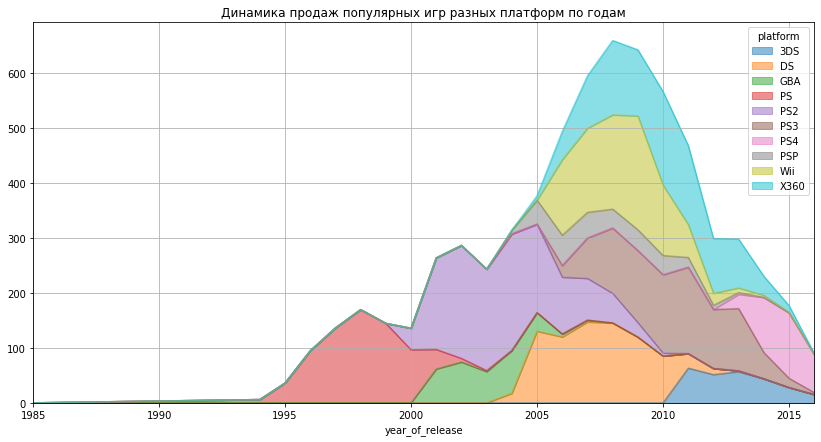

In [55]:
info_about_top_selling_platforms.pivot_table(
    index='year_of_release', values='total_sales', columns='platform', aggfunc='sum').plot(
    kind='area', alpha=0.5, grid=True, figsize=(14,7), 
    title='Динамика продаж популярных игр разных платформ по годам')

Исходя из данных графика, можно сделать вывод, что жизненный цикл платформ составляет примерно 6-10 лет. У некоторых (отмечу, самых успешных в разрезе продаж) платформ - XBOX360 и Wii - наблюдается довольно плавный рост, пик около 1-2 лет и постепенное снижение количества продаж. У других - например, PS2, PS3 и PSP - выделяется несколько пиков за жизненный цикл. 

Также стоит отметить, что говорить о сменяемости платформ не совсем корректно. Новые платформы появляются в то же время, когда уже действующие переживают спад, а иногда и в момент их пика (например так случилось с PSP и PS2), и некоторое время они делят рынок, пока жизненный цикл одной из них не заканчивается. Но прямого перехода по типу "одна платформа перестала быть актуальной, ей на смену пришла другая" на графике не наблюдается.

### Анализ актуальных данных

Исходя из изложенного в пунктах 4.1 и 4.2 и помня о том, что в наши задачи входит анализ данных, необходимых для составления прогноза на 2017 год, актуальными можно считать данные, датированные не ранее 2014 года. 

Сделаем новый срез данных по этому условию и построим график по актуальным данным.

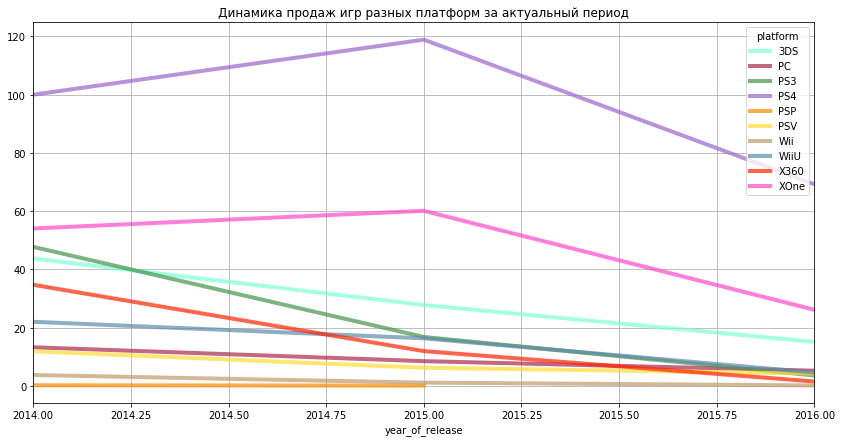

In [56]:
actual_data = initial_data.query('2014 <= year_of_release <= 2016') #делаем срез данных с 2014 по 2016 год
actual_data.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum').plot(
kind='line', alpha=0.7, grid=True, figsize=(14,7), linewidth = 4, title='Динамика продаж игр разных платформ за актуальный период', 
color = ['#7FFFD4', '#AB274F','#44944A', '#9966CC', '#ff8a00', '#FFDC33', '#C19A6B', '#5D8AA8', '#FF2400',
         '#FF47CA']) #строим график

Согласно графику, продажи игр для большинства платформ снижаются. В 2015 году продажи прекратились для платформы РSР. Вплотную приблизились к 0 продажи Wii и Х360.

Рост показали продажи игр для платформ ХОnе и PS4, ставшими лидерами рынка в 2015 году.

**Вывод** \
Потенциально прибыльными в 2017 году я считаю платформы ХОnе и PS4.

Теперь построим "ящики с усами" по актуальным данным в разбивке по платформам. Чтобы график не превратился в демонстрацию выбросов, сначала оценим данные, представленные в столбце total_sales, и уделим особенное внимание квартилям:

In [57]:
print(actual_data['total_sales'].describe())

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64


Построим график для продаж от 0 до 0,41 миллиона копий:

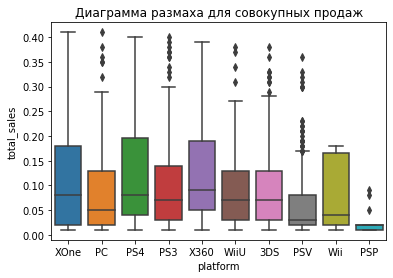

In [58]:
sns.boxplot(x='platform', y='total_sales', data=actual_data.query('0 <= total_sales <= 0.41'))
plt.title('Диаграмма размаха для совокупных продаж')
plt.show()

По платформам ХВ и DS график выглядит необычно, т.к. всем условиям подошли только по одной игре на каждой из этих платформ. В остальных же случаях четко выделяется одна общая деталь: смещение медианы. Метод describe(), примененный ранее, позволил нам также увидеть, что медиана значений стобца о совокупных продажах значительно меньше среднего, т.е данные скошены вправо. Если смотреть в разрезе платформ, то "скошенность" проявляется неравномерно, и ее степень варьируется от платформы к платформе.

### Влияние оценок на продажи на примере платформы XOne

Изучим, как пользовательские и оценки критиков влияют на продажи игр. Для исследования возьмем данные по самой популярной на 2016 год платформе XOne и поместим их в отдельную таблицу. Т.к. мы будем сравнивать влияние обеих оценок, различие в шкалах может создать дополнительные трудности. Поэтому приведем оценки критиков к 10-балльной шкале.

In [59]:
data_xone = actual_data.query('platform=="XOne"') #выделяем нужные данные
initial_data['critic_score'] = (initial_data['critic_score'] / 10) #приводим оценки критиков к 10-балльной шкале

Теперь построим диаграмму размаха, чтобы избавиться от выбросов:

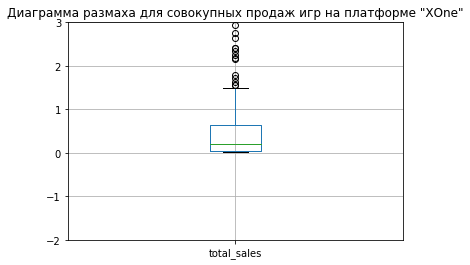

In [60]:
data_xone.boxplot(column='total_sales')
plt.ylim(-2, 3)
plt.title('Диаграмма размаха для совокупных продаж игр на платформе "XOne"')
plt.show()

Согласно диаграмме, выбросы начинаются со значения в 1,6 млн копий. Значит диаграмму рассеяния нужно построить по играм, с продажами от 0 и до 1,6 млн, не включая правый конец. Начнем с исследования взаимосвязи продаж и пользовательских оценок.

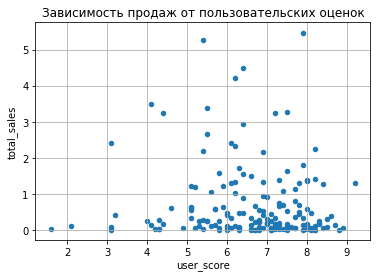

In [61]:
data_xone.query('total_sales < 1,6' and 'user_score != 0').plot(x='user_score', y='total_sales', 
                kind='scatter', title='Зависимость продаж от пользовательских оценок')
plt.grid()
plt.show()

Диаграмма показывает, что между продажами и пользовательскими оценками корреляция практически полностью отсутствует. Проверим это, вызвав метод .corr():

In [62]:
display(data_xone[['user_score', 'total_sales']].corr())

,user_score,total_sales
user_score,1.000000,0.102074
total_sales,0.102074,1.000000


Действительно, согласно шкале Чеддока, между этими двумя параметрами существует лишь слабая корреляционная связь. Она положительная, так что можно сказать, что высокая оценка увеличивает продажи игры - что вполне логично, - но ее влияние крайне слабое. 

Посмотрим, отличается ли ситуация в случае с оценками критиков.

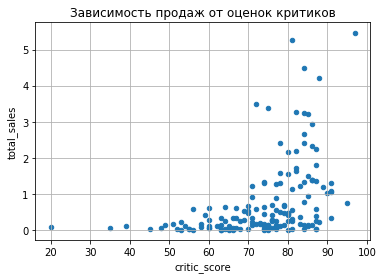

In [63]:
data_xone.query('total_sales < 1,6' and 'critic_score != 0').plot(x='critic_score', y='total_sales', 
                kind='scatter', title='Зависимость продаж от оценок критиков')
plt.grid()
plt.show()

In [64]:
display(data_xone[['critic_score', 'total_sales']].corr())

,critic_score,total_sales
critic_score,1.000000,0.272518
total_sales,0.272518,1.000000


Диаграмма рассеяния демонстрирует более тесную связь между рассматриваемыми параметрами, и коэффициент корреляции это подтверждает - он вплотную приблизился к нижней границе умеренной связи по шкале Чеддока, превысив предыдущее значение на 0,16, что довольно существенно. И несмотря на то, что теснота связи между продажами игр на платформе ХОne и оценками слабая, можно сделать вывод, что оценки критиков влияют на продажи сильнее, чем пользовательские.

### Сравнение влияния оценок на продажи на платформе XOne и других платформах

Теперь проверим, насколько тесно связаны продажи с оценками в разрезе остальных рассматриваемых в исследовании платформ, а затем сравним результаты с полученными на предыдущем этапе. Порядок действий нам уже знаком:

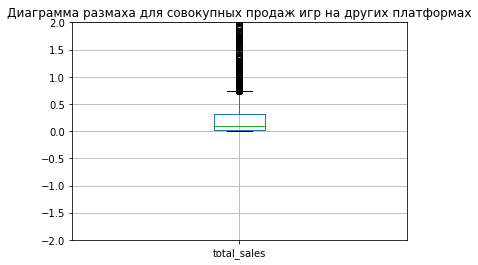

In [65]:
data_other_platforms = actual_data.query('platform!="XOne"') #выделяем нужные данные
data_other_platforms.boxplot(column='total_sales') #определяем границы зон выбросов
plt.ylim(-2, 2)
plt.title('Диаграмма размаха для совокупных продаж игр на других платформах')
plt.show()

На этот раз зона выбросов начинается с отметки в 0,96 млн копий. С учетом этого результата построим диаграмму рассеяния и вычислим коэффициент корреляции для пользовательских оценок:

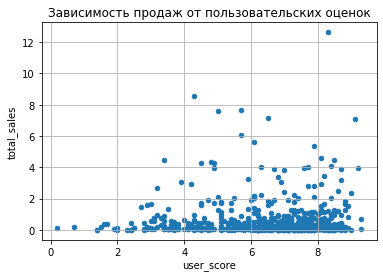

In [66]:
data_other_platforms.query('total_sales < 0,96' and 'user_score != 0').plot(x='user_score', y='total_sales', 
                           kind='scatter', title='Зависимость продаж от пользовательских оценок')
plt.grid()
plt.show()

In [67]:
display(data_other_platforms[['user_score', 'total_sales']].corr())

,user_score,total_sales
user_score,1.000000,0.142655
total_sales,0.142655,1.000000


Теснота связи совокупных продаж и пользовательских оценок в целом выше, чем на отдельно взятой платформе "XOne", но все еще считается слабой. Она так же положительная, следовательно, высокие оценки пользователей оказывают положительное влияние на объемы продаж той или иной игры. 

Далее рассмотрим ситуацию с оценками критиков:

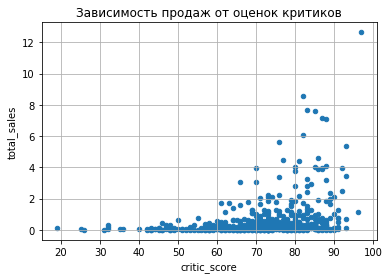

In [68]:
data_other_platforms.query('total_sales < 0,96' and 'critic_score != 0').plot(x='critic_score', y='total_sales', 
                           kind='scatter', title='Зависимость продаж от оценок критиков')
plt.grid()
plt.show()

In [69]:
display(data_other_platforms[['critic_score', 'total_sales']].corr())

,critic_score,total_sales
critic_score,1.000000,0.181348
total_sales,0.181348,1.000000


В данном случае диаграмма рассеяния показывает более сильную положительную связь, и коэффициент корреляции это подтверждает - он выше на 0,04 пункта. Т.е. можно сделать вывод, что, как и в случае с платформой "XOne", оценки критиков теснее связаны с продажами игр и имеют большее влияние на их объемы. В то же время разница в коэффициентах корреляции в случае с отдельно взятой платформой заметно выше, чем при исследовании совокупности нескольких платформ. 

Также хочу отметить, что хоть в данном случае результаты исследования по платформе "XOne" и остальным платформам во многом совпали, это не означает, что так будет с каждой платформой. Результаты могут отличаться, если провести анализ для другой отдельно взятой платформы, и для игр, выпущенных на ее базе, значение пользовательских оценок окажется сильнее, чем оценок критиков. 

Далее рассмотрим распределение игр по жанрам

###  Распределение игр по жанрам

Посмотрим на графике, как распределялись совокупные продажи консольных игр по жанрам в актуальном периоде:

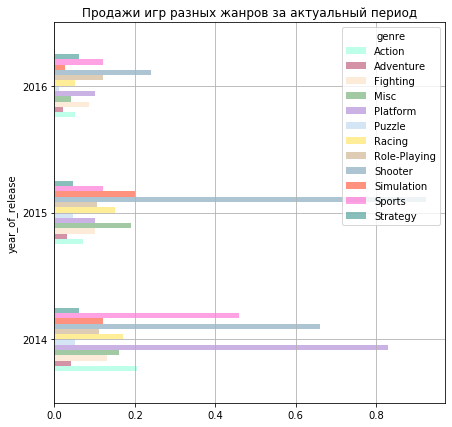

In [70]:
actual_data.pivot_table(index='year_of_release', values='total_sales', columns='genre', aggfunc='median').plot(
kind='barh', alpha=0.5, grid=True, figsize=(7,7), title='Продажи игр разных жанров за актуальный период',
color = ['#7FFFD4', '#AB274F', '#FDD9B5', '#44944A', '#9966CC', '#ABCDEF', '#FFDC33', '#C19A6B', '#5D8AA8',
         '#FF2400','#FF47CA','#158078'])

Согласно графику, самыми прибыльными в актуальном периоде стали игры жанра Shooter. В 2014 году они занимали второе место по продажам, уступая жанру Platform, однако в дальнейшем заняли лидирующую позицию. Именно игры жанра Shooter, на мой взгляд, имеют наибольший потенциал и лучшие перспективы. 

### Вывод

Исследовательский анализ данных позволил прийти к следующим выводам:
- пик выпуска консольных игр пришелся на 2008-2009 гг;
- жизненный цикл платформ составляет примерно 6-10 лет;
- потенциально прибыльными платформами являются XOne и PS4;
- оценки критиков влияют на продажи игр сильнее, чем пользовательские;
- наиболее перспективным жанром консольных игр является жанр Shooter.

## Портрет пользователя в зависимости от региона

###  Составление топ-5 популярных платформ

Определим, какие платформы лидируют по проданным копиям в каждом регионе. Для этого построим диаграмму по имеющимся у нас данным за актуальный период:

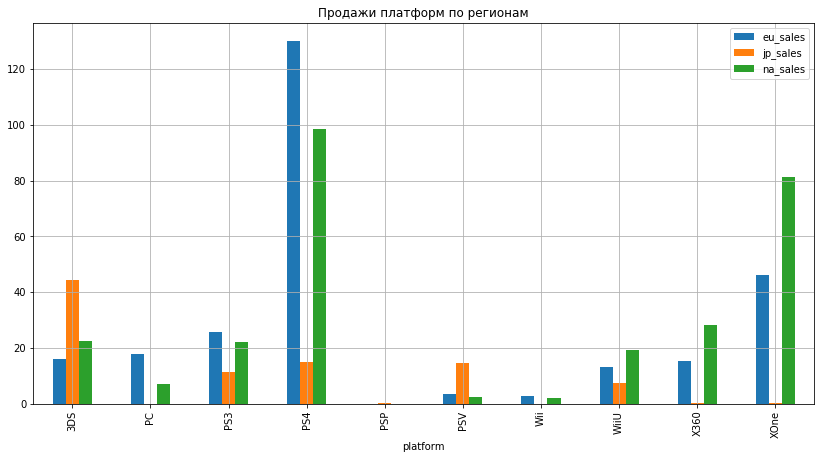

In [71]:
actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], 
aggfunc='sum').plot(kind='bar', figsize=(14, 7), title='Продажи платформ по регионам')
plt.grid()
plt.show()

Согласно построенной диаграмме, топ-5 наиболее популярных платформ выглядят следующим образом:
- Европа:
 * PS4;
 * XOne;
 * PS3;
 * PC;
 * 3DS.
- Япония:
 * 3DS;
 * PS4;
 * PSV;
 * PS3;
 * WiiU.
- Северная Америка:
 * PS4;
 * XOne;
 * Х360;
 * 3DS;
 * PS3.

Также стоит отметить, что по большинству платформ объемы продаж на рынке Японии сильно уступают европейскому и американскому рынкам. Исключение составляют только платформы 3DS и PSV, продажи по которым на рынке Японии сильно превышают объемы продаж в Северной Америке и Европе. 

Интересно так же отметить, что продажи по лидеру европейского и американского рейтинга (PS4) гораздо выше в Европе, а по занявшей второе место XOne - в Америке.

Если говорить о тех платформах, что вошли в топы во всех рассматриваемых регионах, то ими стали PS4 (1, 2, 1 места в Европе, Японии, Америке соответственно), PS3 (3, 4, 5) и 3DS (5, 1, 4). 

###  Составление топ-5 популярных жанров

Далее составим аналогичные рейтинги по жанрам продаваемых игр:

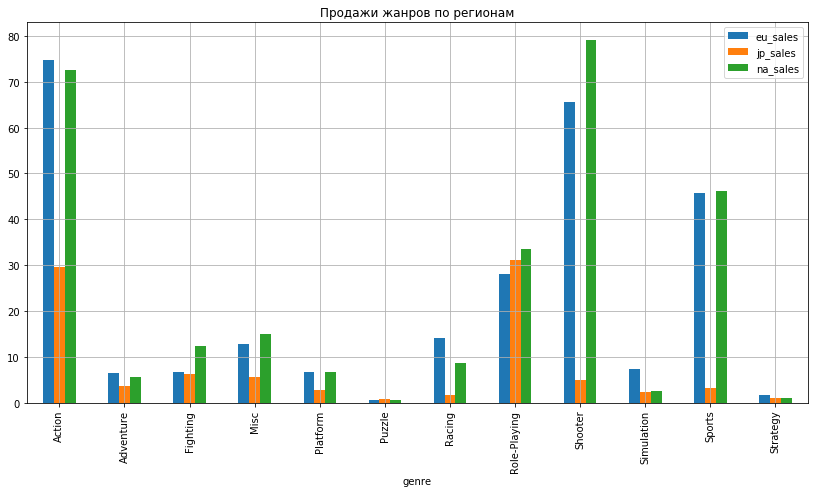

In [72]:
actual_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], 
aggfunc='sum').plot(kind='bar', figsize=(14, 7), title='Продажи жанров по регионам')
plt.grid()
plt.show()

Согласно построенной диаграмме, топ-5 наиболее популярных жанров выглядят следующим образом:
- Европа:
 * Action;
 * Shooter;
 * Sports;
 * Role-playing;
 * Racing.
- Япония:
 * Role-playing;
 * Action;
 * Fighting;
 * Misc;
 * Shooter.
- Северная Америка:
 * Shooter;
 * Action;
 * Sports;
 * Role-playing;
 * Misc.

###  Влияние рейтинга ESRB на продажи в разных регионах

Далее нужно исследовать, влияет ли возрастной рейтинг ESRB на продажи игр. 

На мой взгляд, основная сложность здесь заключается в том, что данный рейтинг используется лишь в США, тогда как в Японии за присвоение возрастного рейтинга играм отвечает CERO, а в большинстве европейских стран (да и то не всех) - PEGI. Не до конца понятно, как оценки этих рейтингов соответствуют друг другу. 

Однако в имеющихся у нас данных представлены именно оценки ESRB, поэтому будем работать с ними. Для начала познакомимся с рейтинговой шкалой:
- «EC» («Early childhood») — «Для детей младшего возраста»: игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими;
- «E» («Everyone») — «Для всех»: содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: игра подходит для детей старше 10 лет и взрослых;
- «T» («Teen») — «Подросткам»: игра подходит для лиц от 13 лет; 
- «M» («Mature») — «Для взрослых»: материалы игры не подходят для подростков младше 17 лет;
- «AO» («Adults Only 18+») — «Только для взрослых»: содержание игры только для взрослых старше 18 лет;
- «RP» («Rating Pending») — «Рейтинг ожидается»: продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Теперь перейдем к созданию графика:

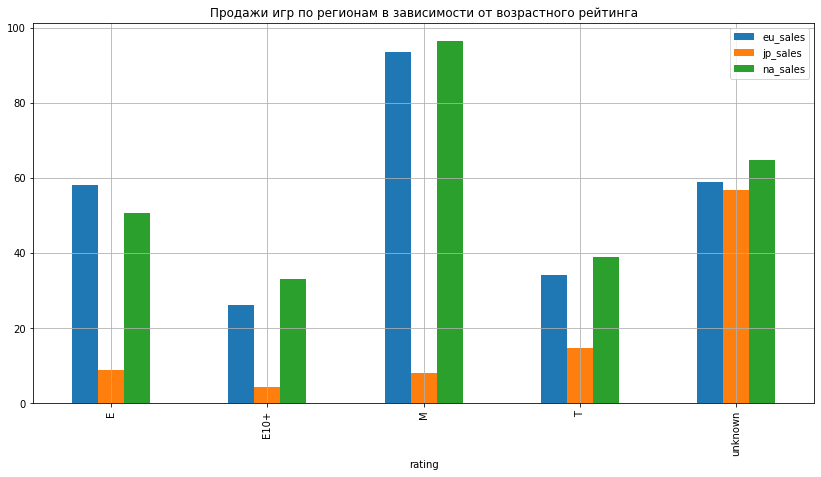

In [73]:
actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(
kind='bar', figsize=(14, 7), title='Продажи игр по регионам в зависимости от возрастного рейтинга')
plt.grid()
plt.show()

Как показывает график, самые продаваемые в Северной Америке и Европе консольные игры имели возрастной рейтинг М и E. В Японии лучше всего продавались игры для подростков от 13 лет (Т) и для детей старше 6 лет (Е). 

Однако также график показывает большую долю игр, для которых не был указан рейтинг ESRB: в Японии таких игр большинство, в других регионах они занимают второе место. Вследствие этого можно сказать, что:
- оценить влияние рейтинга ESRB на продажи в разных регионах можно лишь условно;
- большая доля игр без рейтинга, на мой взгляд, связана с наличием в европейском и японском регионах собственных рейтинговых шкал;
- для  более глубокого и разностороннего анализа следует учитывать возрастные рейтинги, присваиваемые и другими ассоциациями (в частности PEGI и CERO). 

###  Вывод:

Согласно проведенному на этом этапе исследованию, портреты пользователей консольных игр выглядят следующим образом:
- **Европа**: пользователь, выбирающий игры с рейтингом М или Е, предпочитающий такие жанры как "Action" и "Shooter" и отдающий предпочтение консолям на платформах PS4 и XboxOne;
- **Северная Америка**: чаще всего пользователь платформ PS4 и XboxOne, выбирающий игры жанров "Shooter" и "Action" с рейтингом М или Е;
- **Япония**: пользователь, предпочитающий карманные игровые консоли на платформе 3DS и игры в жанрах "Role-playing" и "Action" (данные о популярных рейтингах неизвестны). 

## Проверка гипотез

### Подготовка данных и формулирование гипотез

Переходим к этапу проверки гипотез. 

В данном исследовании статистические гипотезы связаны со средними пользовательскими рейтингами различных платформ и жанров, поэтому для начала нужно вычленить нужные данные из исходных. Помимо того, что данные должны относиться к определенным платформам и жанрам, нас не будут интересовать игры с пользовательскими оценками, равными 0. Итак, переходим к созданию срезов данных:

In [74]:
xone_score = initial_data.query('(platform == "XOne") and (user_score != 0)')
pc_score = initial_data.query('(platform == "PC") and (user_score != 0)')
action_score = initial_data.query('(genre == "Action") and (user_score != 0)')
sports_score = initial_data.query('(genre == "Sports") and (user_score != 0)')

#проверим результат
display (xone_score.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,9.7,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,8.1,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,8.4,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,8.8,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,7.2,4.1,M,3.50
398,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,7.5,5.5,T,3.37
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,8.2,7.5,M,3.28
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,8.4,4.4,E,3.25
422,Halo: The Master Chief Collection,XOne,2014,Shooter,1.91,1.00,0.03,0.29,8.5,7.2,M,3.23
484,Titanfall,XOne,2014,Shooter,1.84,0.80,0.04,0.27,8.6,6.4,M,2.95


Данные подготовлены. Переходим к формулированию гипотез.

Т.к. H₀ всегда формулируется так, чтобы использовать знак равенства, сформулируем нулевые гипотезы следующим образом:
- средние пользовательские рейтинги платформ Xbox One и PC равны;
- средние пользовательские рейтинги жанров "Action" и "Sports" равны.

Первое основное утверждение говорит о равенстве рейтингов, а второе о разнице в них, не уточняя, отличаются ли они в большую или меньшую сторону. Поэтому проверять будем двусторонние гипотезы, и альтернативные статистические гипотезы будут звучать так:
- средние пользовательские рейтинги платформ Xbox One и PC не равны;
- средние пользовательские рейтинги жанров "Action" и "Sports" не равны.

Уровень значимости возьмём равный 5%. Параметру equal_var передадим значение False, так как выборки различаются и это может сильно исказить результаты исследования.

Переходим к проверкам сформулированных гипотез.

### Проверка гипотезы о равенстве пользовательских оценок платформ Xbox One и PC

In [75]:
alpha = 0.05
results = st.ttest_ind (xone_score['user_score'], pc_score['user_score'], equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу


Р-значение оказалось меньше уровня значимости, поэтому мы отвергаем нулевую гипотезу о равенстве пользовательских оценок обеих платформ и принимаем альтернативную гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC не равны.

### Проверка гипотезы о равенстве пользовательских оценок жанров "Action" и "Sports"

In [76]:
alpha = 0.05
results = st.ttest_ind (action_score['user_score'], sports_score['user_score'], equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


В этом случае Р-значение превысило уровень значимости, поэтому мы не смогли отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров "Action" и "Sports".

## Итоговые выводы

Проведенное исследование позволило сделать следующие выводы:
- жизненный цикл платформ обычно не превышает 10 лет;
- наиболее актуальными платформами являются XOne и PS4;
- в Японии стоит выделить платформу для карманных консолей - 3DS;
- высокие оценки пользователей и критиков благотворно влияют на продажи игр, при этом влияние оценок критиков сильнее, чем пользовательских;
- наиболее популярным жанрым является "Action", в Японии стоит отметить жанр "Role-playing"; 
- в Европе и Северной Америке чаще всего покупают игры с возрастными рейтингами "Для всех" или "Для взрослых"; 
- гипотеза о равенстве пользовательских оценок платформ Xbox One и PC была отвергнута;
- гипотеза о равенстве пользовательских оценок жанров "Action" и "Sports" не была отвергнута.

На основании результатов проведенного исследования затруднительно назвать конкретный продукт, который будет потенциально популярен у пользователей в прогнозируемом периоде. Можно сделать вывод, что с большой долей вероятности он будет разработан для консолей Xbox или PlayStation в жанре "Shooter" или "Action" и иметь один из возрастных рейтингов - "Для всех" или "Для взрослых". Также можно предположить, что даже при условии популярности такого продукта у критиков и пользователей, он не сможет охватить и получить лидерство во всех регионах, т.к. в Японии предпочитают карманные консоли и ставят экшн-игры лишь на второе место, а шутеры на пятое.